### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [4]:
data = pd.read_csv('data/coupons.csv')

In [6]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [10]:
data.info() # The following rows are missing values: car, Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50
data.duplicated().sum() # shows 74 duplicated rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

74

3. Decide what to do about your missing data -- drop, replace, other...

In [12]:
deduped = data.drop_duplicates() # New DataFrame with duplicates removed
deduped.info() # The following rows are still missing values: car, Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50
deduped['car'].value_counts() # Missing a lot of data and random categories that don't seem helpful.
dropped_car_df = deduped.drop('car', axis=1)
clean_df=dropped_car_df.dropna() # removes remaining rows that were missing data to produce DataFrame for analysis
clean_df

<class 'pandas.core.frame.DataFrame'>
Index: 12610 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12610 non-null  object
 1   passanger             12610 non-null  object
 2   weather               12610 non-null  object
 3   temperature           12610 non-null  int64 
 4   time                  12610 non-null  object
 5   coupon                12610 non-null  object
 6   expiration            12610 non-null  object
 7   gender                12610 non-null  object
 8   age                   12610 non-null  object
 9   maritalStatus         12610 non-null  object
 10  has_children          12610 non-null  int64 
 11  education             12610 non-null  object
 12  occupation            12610 non-null  object
 13  income                12610 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12503 non-null  obj

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


4. What proportion of the total observations chose to accept the coupon?



In [14]:
clean_df['Y'].value_counts() # 6825 accepted, 5182 did not accept
total = len(clean_df)
accepted_coupon = len(clean_df[clean_df['Y'] == 1])
proportion_accepted = accepted_coupon / total
proportion_accepted # 0.5684184225868244


0.5684184225868244

5. Use a bar plot to visualize the `coupon` column.

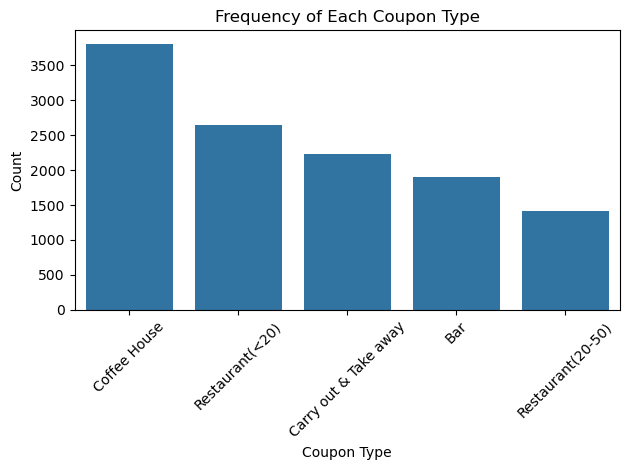

In [38]:
coupon_value_counts = clean_df['coupon'].value_counts() # Coffee House 3809, Restaurant(<20) 2646, Carry out & Take away 2233, Bar 1906, Restaurant(20-50) 1413
coupon_value_counts_df = coupon_value_counts.to_frame(name='count')
coupon_value_counts_df.reset_index()
coupon_barplot = sns.barplot(data=coupon_value_counts_df, x='coupon', y='count')
coupon_barplot.tick_params(axis='x', rotation=45)
coupon_barplot.set_title('Frequency of Each Coupon Type')
plt.xlabel("Coupon Type")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig('./images/coupon_type_frequency.png')
plt.show()

6. Use a histogram to visualize the temperature column.

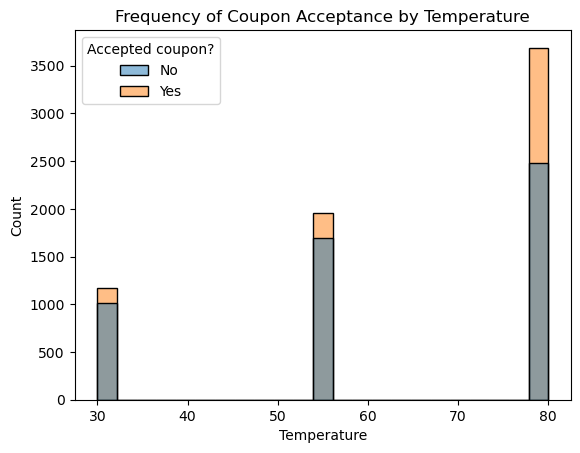

In [18]:
temperature_histogram = sns.histplot(data=clean_df, x='temperature', hue='Y')
temperature_histogram.set_title('Frequency of Coupon Acceptance by Temperature')
legend = temperature_histogram.get_legend()
legend.set_title('Accepted coupon?')
if legend:
      for i, text in enumerate(legend.texts):
          if text.get_text() == '1':
              text.set_text('Yes')
          elif text.get_text() == '0':
              text.set_text('No')
plt.xlabel("Temperature")
plt.savefig('./images/coupon_acceptance_by_temp')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [20]:
bar_coupons_df = clean_df[clean_df['coupon'] == 'Bar']
bar_coupons_df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [360]:
len(bar_coupons_df[bar_coupons_df['Y'] == 1])/len(bar_coupons_df) # 0.4118572927597062

0.4118572927597062

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [24]:
bar_coupons_df['Bar'].value_counts() # never 788, less1 546, 1~3 379, 4~8 147, gt8 46
lt3 = ['never', 'less1', '1~3']
bar_coupons_lt3_times = bar_coupons_df[bar_coupons_df['Bar'].isin(lt3)]
accepted_coupons_lt3_times = bar_coupons_lt3_times[bar_coupons_lt3_times['Y']==1]
accepted_rate_lt3 = len(accepted_coupons_lt3_times)/len(bar_coupons_lt3_times) # 0.37244600116754234
print('accepted_rate_lt3: ', accepted_rate_lt3)
gt3 = ['4~8', 'gt8']
bar_coupons_gt3_times = bar_coupons_df[bar_coupons_df['Bar'].isin(gt3)]
accepted_coupons_gt3 = bar_coupons_gt3_times[bar_coupons_gt3_times["Y"] == 1]
accepted_rate_gt3 = len(accepted_coupons_gt3)/len(bar_coupons_gt3_times) # 0.7616580310880829
print('accepted_rate_gt3: ', accepted_rate_gt3)


accepted_rate_lt3:  0.37244600116754234
accepted_rate_gt3:  0.7616580310880829


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [26]:
overall_acceptance = bar_coupons_df[bar_coupons_df['Y']==1]
overall_acceptance_rate = len(overall_acceptance) / len(bar_coupons_df) # 0.4118572927597062
print('overall_acceptance_rate: ', overall_acceptance_rate)
one_or_more = ['1~3', '4~8', 'gt8']
over_25 = ['26', '31', '50plus', '36', '41', '46']
once_month_plus_and_over_25 = bar_coupons_df[bar_coupons_df['Bar'].isin(one_or_more) & bar_coupons_df['age'].isin(over_25)]
once_month_plus_and_over_25_accepted = once_month_plus_and_over_25[once_month_plus_and_over_25['Y'] == 1]
once_month_over_25_acceptance_rate = len(once_month_plus_and_over_25_accepted)/len(once_month_plus_and_over_25) # 0.6898263027295285
print('once_month_over_25_acceptance_rate: ', once_month_over_25_acceptance_rate)


overall_acceptance_rate:  0.4118572927597062
once_month_over_25_acceptance_rate:  0.6898263027295285


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [28]:
bar_coupons_df['occupation'].value_counts()
filtered_df = bar_coupons_df[bar_coupons_df['passanger'].ne('Kid(s)') & bar_coupons_df['Bar'].isin(one_or_more) & bar_coupons_df['occupation'] != 'Farming Fishing & Forestry']
acceptance_rate = len(filtered_df[filtered_df['Y'] == 1])/len(filtered_df) # 0.4118572927597062
print('acceptance_rate: ', acceptance_rate)

acceptance_rate:  0.4118572927597062


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [30]:
# go to bars more than once a month, had passengers that were not a kid, and were not widowed
bar_coupons_df['maritalStatus'].value_counts()
freq_bar_passengers_not_widowed = bar_coupons_df[bar_coupons_df['passanger'].ne('Kid(s)') & bar_coupons_df['Bar'].isin(one_or_more) & bar_coupons_df['maritalStatus'] != 'Widowed']
accepted_freq_bar_passengers_not_widowed = freq_bar_passengers_not_widowed[freq_bar_passengers_not_widowed["Y"] == 1]
rate_freq_bar_passengers_not_widowed = len(accepted_freq_bar_passengers_not_widowed) / len(freq_bar_passengers_not_widowed) # 0.4118572927597062
print('rate_freq_bar_passengers_not_widowed: ', rate_freq_bar_passengers_not_widowed)

rate_freq_bar_passengers_not_widowed:  0.4118572927597062


In [32]:
# go to bars more than once a month and are under the age of 30
under_30 = ['21', '26', 'below21']
bars_once_under_30 = bar_coupons_df[bar_coupons_df['Bar'].isin(one_or_more) & bar_coupons_df['age'].isin(under_30)]
bars_once_under_30_accepted = bars_once_under_30[bars_once_under_30['Y'] == 1]
acceptance_rate_under_30_freq_bars = len(bars_once_under_30_accepted)/len(bars_once_under_30) # 0.7195121951219512
print('acceptance_rate_under_30_freq_bars: ', acceptance_rate_under_30_freq_bars)

acceptance_rate_under_30_freq_bars:  0.7195121951219512


In [34]:
# go to cheap restaurants more than 4 times a month and income is less than 50K
# bar_coupons_df['RestaurantLessThan20'].value_counts()
more_than_four_times = ['4~8', 'gt8']
income_options=['$25000 - $37499', '$37500 - $49999', 'Less than $12500']
filtered = bar_coupons_df[bar_coupons_df['income'].isin(income_options) & bar_coupons_df['RestaurantLessThan20'].isin(more_than_four_times)]
filtered_accepted = filtered[filtered["Y"]==1]
rate = len(filtered_accepted) / len(filtered) # 0.46835443037974683
print('rate: ', rate)

rate:  0.46835443037974683


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
The drivers who accepted the bar coupons are more likely to have visited bars recently and are younger 
(although I would like to do more analysis on the age cutoff).

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [44]:
exp_rest_df = clean_df[clean_df['coupon'] == 'Restaurant(20-50)']
accepted_exp_rest_df = exp_rest_df[exp_rest_df['Y'] == 1]
acceptance_rate = len(accepted_exp_rest_df)/len(exp_rest_df)
print('acceptance_rate: ', acceptance_rate)


acceptance_rate:  0.4465675866949752


In [55]:
# acceptance rate of those who have visited RestaurantLessThan20 recently
exp_rest_df['Restaurant20To50'].value_counts()
low_visit_freq = ['less1', 'never']
high_visit_freq = ['1~3', '4~8', 'gt8']
low_freq_df_total = exp_rest_df[exp_rest_df['Restaurant20To50'].isin(low_visit_freq)]
low_freq_df_accepted = low_freq_df_total[low_freq_df_total['Y'] == 1]
low_freq_accept_rate = len(low_freq_df_accepted)/len(low_freq_df_total) # 0.3890086206896552
print('low_freq_accept_rate: ', low_freq_accept_rate)

high_freq_df_total = exp_rest_df[exp_rest_df['Restaurant20To50'].isin(high_visit_freq)]
high_freq_df_accepted = high_freq_df_total[high_freq_df_total['Y'] == 1]
high_freq_accept_rate = len(high_freq_df_accepted)/len(high_freq_df_total) # 0.5567010309278351
print('high_freq_accept_rate: ', high_freq_accept_rate)


low_freq_accept_rate:  0.3890086206896552
high_freq_accept_rate:  0.5567010309278351


In [63]:
# acceptance of those by income
exp_rest_df['income'].value_counts()
below_50k = ['$25000 - $37499', '$37500 - $49999', '$12500 - $24999', 'Less than $12500']
above_50k = ['$100000 or More', '$50000 - $62499', '$75000 - $87499', '$87500 - $99999', '$62500 - $74999']

lt50_freq_total = exp_rest_df[exp_rest_df['income'].isin(below_50k)]
lt50_freq_acc = lt50_freq_total[lt50_freq_total['Y'] == 1]
lt50_rate = len(lt50_freq_acc) / len(lt50_freq_total) # 0.4350828729281768
print('lt50_rate: ', lt50_rate)

gt50_freq_total = exp_rest_df[exp_rest_df['income'].isin(above_50k)]
gt50_freq_acc = gt50_freq_total[gt50_freq_total['Y'] == 1]
gt50_rate = len(gt50_freq_acc) / len(gt50_freq_total) # 0.45863570391872277
print('gt50_rate: ', gt50_rate)

lt50_rate:  0.4350828729281768
gt50_rate:  0.45863570391872277


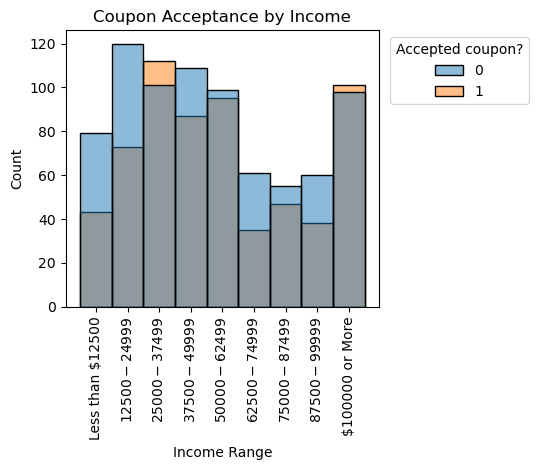

In [111]:
income_df = exp_rest_df.copy()
# ordering the age categories so they're displayed youngest to oldest
income_df['income'] = pd.Categorical(income_df["income"], categories=['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999', '$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999', '$100000 or More'], ordered=True)
income_histogram = sns.histplot(data=income_df, x='income', hue='Y')
income_histogram.set_title('Coupon Acceptance by Income')
income_histogram.tick_params(axis='x', rotation=90)
# income_histogram.set_xticks(['below21', '21', '26', '31', '36', '41', '46', '50plus'])
# income_histogram.set_xticklabels(['Below 21', '21', '26', '31', '36', '41', '46', 'Over 50'])
income_legend = income_histogram.get_legend()
income_legend.set_title('Accepted coupon?')
if legend:
  for i, text in enumerate(legend.texts):
    if text.get_text() == '1':
        text.set_text('Yes')
    elif text.get_text() == '0':
        text.set_text('No')
sns.move_legend(income_histogram, "upper right", bbox_to_anchor=(1.5, 1))
plt.xlabel("Income Range")
plt.tight_layout()
plt.savefig('./images/acceptance_by_income.png')
plt.show()

In [69]:
# acceptance of those by age (over 40 vs under 40)
exp_rest_df['age'].value_counts()
over_40 = ['50plus', '41', '46']
under_40 = ['21', '26', '31', '36', 'below21']

lt40 = exp_rest_df[exp_rest_df['age'].isin(under_40)]
lt40_accepted = lt40[lt40['Y'] == 1]
lt40_rate = len(lt40_accepted) / len(lt40) # 0.46215943491422806
print('lt40_rate: ', lt40_rate)

gt40 = exp_rest_df[exp_rest_df['age'].isin(over_40)]
gt40_accepted = gt40[gt40['Y'] == 1]
gt40_rate = len(gt40_accepted) / len(gt40)  # 0.4099526066350711
print('gt40_rate: ', gt40_rate)

lt40_rate:  0.46215943491422806
gt40_rate:  0.4099526066350711


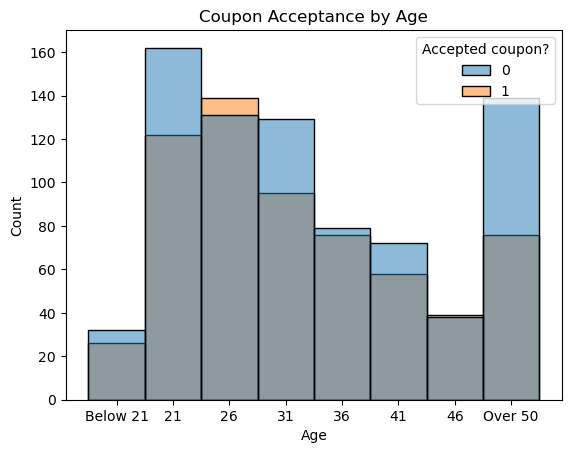

In [89]:
age_df = exp_rest_df.copy()
# ordering the age categories so they're displayed youngest to oldest
age_df['age'] = pd.Categorical(age_df["age"], categories=['below21', '21', '26', '31', '36', '41', '46', '50plus'], ordered=True)
age_histogram = sns.histplot(data=age_df, x='age', hue='Y')
age_histogram.set_title('Coupon Acceptance by Age')
age_histogram.set_xticks(['below21', '21', '26', '31', '36', '41', '46', '50plus'])
age_histogram.set_xticklabels(['Below 21', '21', '26', '31', '36', '41', '46', 'Over 50'])
age_legend = age_histogram.get_legend()
age_legend.set_title('Accepted coupon?')
if legend:
  for i, text in enumerate(legend.texts):
    if text.get_text() == '1':
        text.set_text('Yes')
    elif text.get_text() == '0':
        text.set_text('No')
plt.xlabel("Age")
plt.savefig('./images/acceptance_by_age.png')
plt.show()

In [71]:
# highest visit frequency
middle_freq = ['less1', 'never', '1~3']
highest_freq = ['4~8', 'gt8']
middle_freq_total = exp_rest_df[exp_rest_df['Restaurant20To50'].isin(middle_freq)]
middle_freq_acc = middle_freq_total[middle_freq_total['Y'] == 1]
middle_freq_rate = len(middle_freq_acc)/len(middle_freq_total) # 0.42868157286044717
print('middle_freq_rate: ', middle_freq_rate)

high_freq_total = exp_rest_df[exp_rest_df['Restaurant20To50'].isin(highest_freq)]
high_freq_acc = high_freq_total[high_freq_total['Y'] == 1]
high_freq_rate = len(high_freq_acc)/len(high_freq_total) # 0.646551724137931
print('high_freq_rate: ', high_freq_rate)

middle_freq_rate:  0.42868157286044717
high_freq_rate:  0.646551724137931


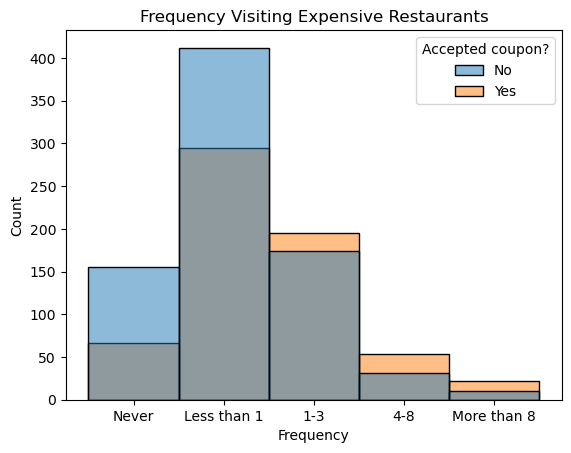

In [87]:
updated_df = exp_rest_df.copy()
# ordering the frequency categories so they're displayed fewest to most
updated_df['Restaurant20To50'] = pd.Categorical(updated_df["Restaurant20To50"], categories=['never', 'less1', '1~3', '4~8', 'gt8'], ordered=True)
freq_visits_histogram = sns.histplot(data=updated_df, x='Restaurant20To50', hue='Y')
freq_visits_histogram.set_title('Frequency Visiting Expensive Restaurants')
freq_visits_histogram.set_xticks(['never', 'less1', '1~3', '4~8', 'gt8'])
freq_visits_histogram.set_xticklabels(['Never', "Less than 1", "1-3", "4-8", "More than 8"])
legend = freq_visits_histogram.get_legend()
legend.set_title('Accepted coupon?')
if legend:
  for i, text in enumerate(legend.texts):
    if text.get_text() == '1':
        text.set_text('Yes')
    elif text.get_text() == '0':
        text.set_text('No')
plt.xlabel("Frequency")
plt.savefig('./images/freq_visiting_exp_restaurants.png')
plt.show()

In [ ]:
The best predictor for whether someone would accept the coupon for an expensive restaurant was whether, and how often, 
they frequented expensive restaurants generally. The more frequently users visited expensive restaurants, the more likely they were to accept
the coupon. Age and income did not have a noticeable impact on acceptance rate.